In [71]:
import pandas as pd


In [120]:
df = pd.read_excel('Final_Data.xlsx',engine='openpyxl')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689 entries, 0 to 5688
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Status             5689 non-null   object
 1   Description        5680 non-null   object
 2   Comments           5689 non-null   object
 3   Priority           5689 non-null   object
 4   RootCause          1737 non-null   object
 5   Reporter           5689 non-null   object
 6   IssueKey           5689 non-null   object
 7   Summary            5689 non-null   object
 8   Sprint             3249 non-null   object
 9   Component          5229 non-null   object
 10  Application        5679 non-null   object
 11  Assigne            5612 non-null   object
 12  Status_Categories  3278 non-null   object
dtypes: object(13)
memory usage: 577.9+ KB


In [122]:
#printing unique values for each column

df.nunique()

Status                  2
Description          5604
Comments             5281
Priority                4
RootCause              11
Reporter              227
IssueKey             5689
Summary              5636
Sprint                 47
Component             141
Application            14
Assigne               273
Status_Categories      13
dtype: int64

In [123]:
df.isna().sum()

Status                  0
Description             9
Comments                0
Priority                0
RootCause            3952
Reporter                0
IssueKey                0
Summary                 0
Sprint               2440
Component             460
Application            10
Assigne                77
Status_Categories    2411
dtype: int64

In [124]:
#Here we can remove couple of colums
df = df.drop(['RootCause','Reporter','IssueKey','Sprint','Component','Assigne','Status_Categories'],axis=1)

In [125]:
df

,Status,Description,Comments,Priority,Summary,Application
0,Invalid,"Build: PI7.6 FE + 8.2 BE Hotfix , App Version:...",[],P3 - Medium,CERT|SailorAPP| On-board | Cabin Services | I...,Sailor App
1,Invalid,Ship parse count for housekeeping requests:\n ...,[{'author': {'accountId': '5e8b26768764110b816...,P3 - Medium,Counts in the parse tables are not matching be...,Crew VXP
2,Invalid,Hi [~accountid:5ade5093027e7a2ebfcbd97e] / [~a...,[{'author': {'accountId': '5ade5093027e7a2ebfc...,P2 - High,Magnolia | KAFKA | Ship Side Events are not co...,Sailor App
3,Invalid,Ship side team has successfully uploaded the s...,[{'author': {'accountId': '5caee6ee6c3b6b270f4...,P2 - High,VV-Prod-Ship | VM - Bulk uploaded successfully...,Crew VXP
4,Invalid,Hit the application url and do the booking flo...,[{'author': {'accountId': '5dcdc9960e14000dd49...,P4 - Low,DWP-QA-Spinner getting displayed in the top le...,eCommerce
...,...,...,...,...,...,...
5684,valid,Steps to Reproduce:\n\n1) Launch the applicati...,[{'author': {'accountId': '557058:138cc1fd-460...,P4 - Low,"Cabin Tablet | QA | ""Writer"" label is missing ...",Sailor App
5685,valid,For SailorId - '001g00000238syEAAQ' which has ...,[{'author': {'accountId': '557058:26d72d9d-812...,P2 - High,QA | Seaware Reservation event not produced,Sailor App
5686,valid,Steps:\n1. Launch the build.\n2. Navigate to M...,[{'author': {'accountId': '5c893fecee0f2d70e23...,P3 - Medium,"SAPP | Cabin Tablet | QA | ""Power"" button of M...",Sailor App
5687,valid,# Go to Settings# Click on Avatar# Select Make...,[{'author': {'accountId': '5b7aea1fb96a5b58cd3...,P2 - High,[Android] Camera isn't opened after clicking o...,Sailor App


In [126]:
df.duplicated().sum()

2

In [127]:
df[df.duplicated()]

,Status,Description,Comments,Priority,Summary,Application
1118,Invalid,test,[],P3 - Medium,test exalate,Other
1310,Invalid,test,[],P3 - Medium,test exalate,Other


In [128]:
df = df.drop_duplicates()

In [129]:
df.isnull().sum()

Status          0
Description     9
Comments        0
Priority        0
Summary         0
Application    10
dtype: int64

In [130]:
#here there are null values for description column , but this is the major input, so we drop all the corresponding rows
df.dropna(subset=['Description'],inplace=True)

c:\Users\Jyothi\My_WorkSpace\cigniti_usecase\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [131]:
df.describe()

,Status,Description,Comments,Priority,Summary,Application
count,5678,5678,5678,5678,5678,5668
unique,2,5604,5272,4,5628,14
top,valid,Please check added video,[],P2 - High,VV Prod | Booking website | Getting error for ...,Sailor App
freq,3271,17,407,2430,8,4144


In [132]:
df['Application'].value_counts()

Sailor App      4144
eCommerce        565
Crew VXP         470
CRM              175
Other            118
FirstMates        76
Seaware Main      36
Integrations      20
NBX               20
Reporting         16
VV Site           14
MXP               12
Odysseus           1
Fevo               1
Name: Application, dtype: int64

In [133]:
df['Application'].isnull().sum()

10

In [134]:
#let us replace null values with unknown
df['Application'].fillna('unknown',inplace=True)

c:\Users\Jyothi\My_WorkSpace\cigniti_usecase\venv\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5678 entries, 0 to 5688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Status       5678 non-null   object
 1   Description  5678 non-null   object
 2   Comments     5678 non-null   object
 3   Priority     5678 non-null   object
 4   Summary      5678 non-null   object
 5   Application  5678 non-null   object
dtypes: object(6)
memory usage: 310.5+ KB


In [136]:
df.columns

Index(['Status', 'Description', 'Comments', 'Priority', 'Summary',
       'Application'],
      dtype='object')

In [137]:
#let us see if there is any relation between status, priority & application
#status,priority
#create a contingency table and perform a chi-squred test of independence
contingency_table_priority = pd.crosstab(df['Priority'],df['Status'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table_priority)


In [138]:
p

9.693660540257826e-39

In [139]:
#create a contingency table and perform a chi-squred test of independence
contingency_table_application = pd.crosstab(df['Application'],df['Status'])

chi2, p, dof, expected = chi2_contingency(contingency_table_application)



In [140]:
p

0.0

In [ ]:
#here the p values obtained from chi2 test says that there is no dependence between status and priority and with application

In [141]:
#combine description and summary column

df['Description'] = df['Description']+ " "+df['Summary']

c:\Users\Jyothi\My_WorkSpace\cigniti_usecase\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [142]:
df.drop(['Summary'],axis=1,inplace=True)

c:\Users\Jyothi\My_WorkSpace\cigniti_usecase\venv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [143]:
df

,Status,Description,Comments,Priority,Application
0,Invalid,"Build: PI7.6 FE + 8.2 BE Hotfix , App Version:...",[],P3 - Medium,Sailor App
1,Invalid,Ship parse count for housekeeping requests:\n ...,[{'author': {'accountId': '5e8b26768764110b816...,P3 - Medium,Crew VXP
2,Invalid,Hi [~accountid:5ade5093027e7a2ebfcbd97e] / [~a...,[{'author': {'accountId': '5ade5093027e7a2ebfc...,P2 - High,Sailor App
3,Invalid,Ship side team has successfully uploaded the s...,[{'author': {'accountId': '5caee6ee6c3b6b270f4...,P2 - High,Crew VXP
4,Invalid,Hit the application url and do the booking flo...,[{'author': {'accountId': '5dcdc9960e14000dd49...,P4 - Low,eCommerce
...,...,...,...,...,...
5684,valid,Steps to Reproduce:\n\n1) Launch the applicati...,[{'author': {'accountId': '557058:138cc1fd-460...,P4 - Low,Sailor App
5685,valid,For SailorId - '001g00000238syEAAQ' which has ...,[{'author': {'accountId': '557058:26d72d9d-812...,P2 - High,Sailor App
5686,valid,Steps:\n1. Launch the build.\n2. Navigate to M...,[{'author': {'accountId': '5c893fecee0f2d70e23...,P3 - Medium,Sailor App
5687,valid,# Go to Settings# Click on Avatar# Select Make...,[{'author': {'accountId': '5b7aea1fb96a5b58cd3...,P2 - High,Sailor App


<AxesSubplot:xlabel='Status'>

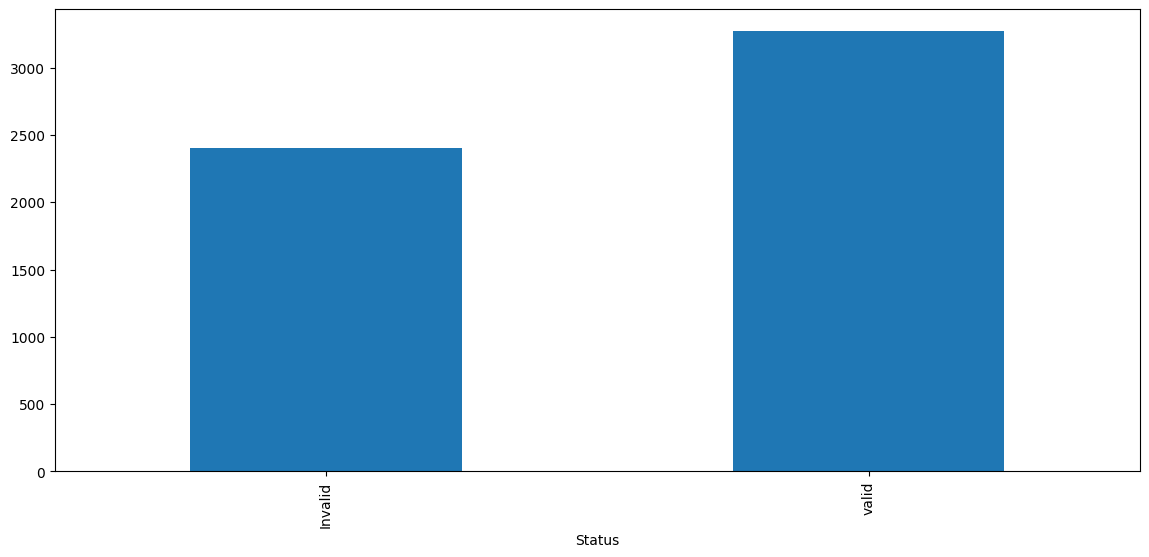

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,6))
df.groupby('Status')['Status'].count().sort_values().plot.bar()

In [145]:
df['Status'].value_counts()

valid      3271
Invalid    2407
Name: Status, dtype: int64

In [149]:
data = df

In [150]:
df['word_count']=df['Description'].apply(lambda x: len(str(x).split(" ")))
df[['Description','word_count']].head()

c:\Users\Jyothi\My_WorkSpace\cigniti_usecase\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Description,word_count
0,"Build: PI7.6 FE + 8.2 BE Hotfix , App Version:...",124
1,Ship parse count for housekeeping requests:\n ...,43
2,Hi [~accountid:5ade5093027e7a2ebfcbd97e] / [~a...,89
3,Ship side team has successfully uploaded the s...,46
4,Hit the application url and do the booking flo...,44


In [151]:
#descriptive statistics of wordcount
df['word_count'].describe()

count    5678.000000
mean       81.775625
std        73.181102
min         2.000000
25%        45.000000
50%        70.000000
75%       105.000000
max      3278.000000
Name: word_count, dtype: float64

In [152]:
#identify the most commonn words
pd.Series(" ".join(df['Description']).split(" "))

0            Build:
1             PI7.6
2                FE
3                 +
4               8.2
            ...    
464317         only
464318    partially
464319    completed
464320    emergency
464321      contact
Length: 464322, dtype: object

In [153]:
pd.Series(" ".join(df['Description']).split(" ")).value_counts()[:10]

the    21560
       17921
to     14060
is      9102
and     8653
on      8177
in      7581
not     5257
for     4854
|       4536
dtype: int64

In [154]:
#identify the uncommon words
pd.Series(" ".join(df['Description']).split(" ")).value_counts()[-10:]

*Precondition*:User                                                               1
RTS_Text                                                                          1
7.3\n\n+Issue:+\n\nStatus                                                         1
need?                                                                             1
2:\n1.                                                                            1
behavior:\n\n*                                                                    1
https://int.virginvoyages.com/svc/rts-bff/traveldocuments/ocr/passport\nStatus    1
Entertainment->Series\n3.                                                         1
venues(Eateries)\n*Expected-*                                                     1
!Flight_Number_flight_validation.png|thumbnail!                                   1
dtype: int64

In [155]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jyothi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jyothi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jyothi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [173]:
stop_words = nltk.corpus.stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [174]:
#there are few words in the stopwords list that we might actually require - for ex: not, shouldnot etc,
#its better to remove them from the stopwords list

not_words = ['not', 'no', 'nor', 'don', "don't", 'should', "should've", 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [175]:
#remove not words from stopwords list
for word in not_words:
    stop_words.remove(word)

In [176]:
#definig custom stopwords list

#creating a list of custom stopwords
newStopwords = ['image','png','thumbnail']
stop_words.extend(newStopwords)


In [177]:
stop_words = [item.lower() for item in stop_words]

In [178]:
#Convert the stopwords list to a set for faster membership checking
stop_words = set(stop_words)

In [179]:
#function for preprocessing the data

def remove_urls(text):
    new_text = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

#make all text lower case
def text_lowercase(text):
    return text.lower()

#remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+','',text)
    return result

#remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator)

#tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

#remove stop words
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

#lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text


#function to handle all the above functions
def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    
    text = ' '.join(text)
    return text

In [180]:
#there are many word patterns which are not useful, we can now remove them
#remove [~accountid:5ade5093027e7a2ebfcbd97e] 
# Define the pattern to match
pattern = r'\[~accountid:.*\]'

# Define the replacement string
replacement = ' '
df['Description']=df['Description'].apply(lambda x: re.sub(pattern,replacement,str(x)))

c:\Users\Jyothi\My_WorkSpace\cigniti_usecase\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [181]:
#now replace this pattern [^0-02-04-79c6bd14fa3611bdbf56283c4977c5c507deff3707beb53620152564aed2fe1f_ff4f204b.mp4] 

pattern = r'\[([^\]]+)\]\.mp4]'
replacement = ' '
df['Description']=df['Description'].apply(lambda x: re.sub(pattern,replacement,str(x)))

c:\Users\Jyothi\My_WorkSpace\cigniti_usecase\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [182]:
#remove email ids
# Regular expression pattern to match an email address-> porter.love@yandex.com
pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
replacement = " "
df['Description']=df['Description'].apply(lambda x: re.sub(pattern,replacement,str(x)))

c:\Users\Jyothi\My_WorkSpace\cigniti_usecase\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [167]:
#lets put the text column through this preprocessing pipeline

pp_text_train = [] #preprocessed text column

for text_data in df['Description']:
    pp_text_data = preprocessing(text_data)
    pp_text_train.append(pp_text_data)
    
df['Processed Text'] = pp_text_train #add the preprocessed text as a column

c:\Users\Jyothi\My_WorkSpace\cigniti_usecase\venv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [168]:
df['Processed Text'][2]

'hi getting event log kibana ship side however getting shore side causing data mismatch cm e please get checked thanks dev shore dev ship event log last day int shore int ship event log last day cert shore cert ship event log last day example shore razzle dazzle event json magnolia kafka ship side event coming'

In [183]:
df['Processed Text']

0       build pi fe hotfix app version device android ...
1       ship parse count housekeeping request image pn...
2       hi getting event log kibana ship side however ...
3       ship side team successfully uploaded sheet vis...
4       hit application url booking flow actual result...
                              ...                        
5684    step reproduce launch application navigate ent...
5685    sailorid gsyeaaq booking id updated email via ...
5686    step launch build navigate movie entertainment...
5687    go setting click avatar select make photo came...
5688    vv sailor app rts porthole security pregnancy ...
Name: Processed Text, Length: 5678, dtype: object

In [184]:
df[['Processed Text','Description']].to_excel('Processed_text1.xlsx')

In [191]:
df = df.astype(str)

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#top unigrams

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse = True)
    return words_freq[:n]

common_words = get_top_n_words(df['Processed Text'],100)
for word, freq in common_words:
    print(word, freq)
    
df1 = pd.DataFrame(common_words, columns= ['Processed Text','count'])

sailor 8247
app 4838
page 4216
result 3308
screen 3242
expected 3177
displayed 2723
voyage 2682
actual 2663
step 2662
booking 2435
user 2203
click 2144
detail 2128
cabin 2125
sailorapp 2101
login 2069
tap 1934
reproduce 1817
device 1809
cert 1802
build 1736
reservation 1626
button 1617
go 1553
issue 1546
account 1523
excursion 1496
observe 1426
launch 1385
test 1359
time 1328
rts 1210
name 1201
vv 1189
card 1128
error 1122
qa 1108
select 1097
able 1095
payment 1083
iphone 1037
ship 1035
please 1017
navigate 1014
credential 987
day 986
attached 986
note 960
shore 955
android 954
date 951
id 938
admin 937
icon 934
check 932
sign 927
see 912
back 888
message 888
video 876
setting 876
application 873
port 852
email 849
used 847
number 837
pre 829
data 819
open 818
design 814
field 807
book 779
log 775
tablet 770
section 764
service 761
contact 759
text 756
refer 753
booked 753
width 724
status 718
password 703
event 701
height 693
tv 692
screenshot 687
filter 685
notification 664
task 661


In [195]:
#top bigrams

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2),stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse = True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['Processed Text'],100)
for word, freq in common_words:
    print(word, freq)
    
df2 = pd.DataFrame(common_words, columns= ['Processed Text','count'])

sailor app 3183
step reproduce 1773
actual result 1493
expected result 1468
reproduce launch 971
width height 666
launch sailorapp 539
device iphone 525
observe behavior 489
login sailorapp 475
vv sailor 460
shore thing 452
pre cruise 433
sailorapp login 430
refer attachment 414
cert sailor 414
test data 408
cabin tablet 402
detail page 399
login sailor 376
cabin tv 373
reproduce login 350
iphone build 343
cert sailorapp 336
note refer 317
travel document 308
app qa 293
infinite loading 289
home page 281
shore excursion 279
build cert 275
behavior actual 273
launch sailor 265
credential admin 259
existing account 258
error message 253
sailor detail 248
book excursion 247
sailor able 244
attached recording 238
payment method 238
qa sailorapp 235
valid credential 234
primary sailor 232
reservation number 224
account setting 223
user able 222
sailorapp existing 219
build used 219
refer attached 217
please find 216
data used 216
emergency contact 209
device used 209
contact detail 208
time

In [199]:
#top trigrams

def get_top_n_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words = stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse = True)
    return words_freq[:n]

common_words = get_top_n_trigrams(df['Processed Text'],100)
for word, freq in common_words:
    print(word, freq)
    
df3 = pd.DataFrame(common_words, columns= ['Processed Text','count'])

step reproduce launch 969
reproduce launch sailorapp 487
vv sailor app 435
launch sailorapp login 416
cert sailor app 408
sailorapp login sailorapp 375
login sailor app 357
step reproduce login 347
device iphone build 325
observe behavior actual 251
launch sailor app 251
sailor app qa 240
note refer attachment 232
login sailorapp existing 217
sailorapp existing account 215
test data used 213
reproduce launch sailor 196
device used iphone 179
please find attached 167
pre cruise homepage 165
reproduce login sailor 151
account pif reservation 149
iphone build cert 147
existing account pif 138
pif reservation linked 137
refer attachment cert 134
behavior actual result 130
sailor app pre 128
sailor app shipboard 127
refer attachment qa 119
refer attached recording 118
build cert release 115
screenshot width height 113
cabin tv remote 113
rts travel document 112
reservation linked credential 112
admin reservation number 111
rpreplay final mp 109
data used admin 108
stage sailor app 104
attac

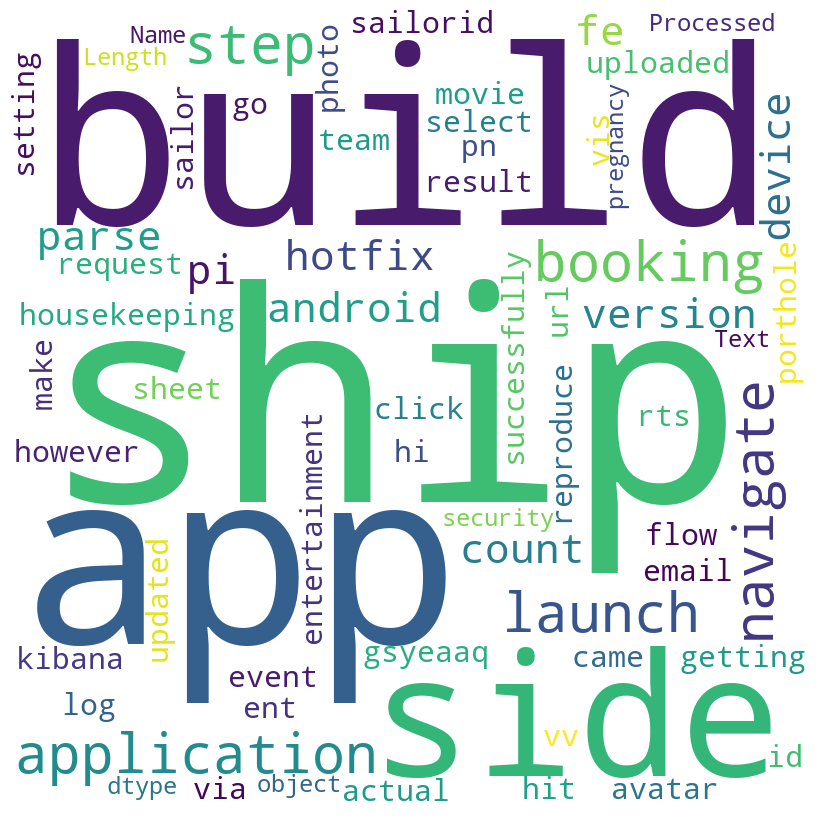

In [201]:
#word cloud
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(str(df['Processed Text']))

#plot the wordcloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad =0)

plt.show()


In [202]:
#let us encode status, priority, application column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Status','Priority','Application']:
    df[col] = le.fit_transform(df[col])

print(df)

      Status                                        Description  \
0          0  Build: PI7.6 FE + 8.2 BE Hotfix , App Version:...   
1          0  Ship parse count for housekeeping requests:\n ...   
2          0  Hi  \n\nWe are not getting any Event Logs in K...   
3          0  Ship side team has successfully uploaded the s...   
4          0  Hit the application url and do the booking flo...   
...      ...                                                ...   
5684       1  Steps to Reproduce:\n\n1) Launch the applicati...   
5685       1  For SailorId - '001g00000238syEAAQ' which has ...   
5686       1  Steps:\n1. Launch the build.\n2. Navigate to M...   
5687       1  # Go to Settings# Click on Avatar# Select Make...   
5688       1  VV Sailor App | RTS | The porthole for securit...   

                                               Comments  Priority  \
0                                                    []         2   
1     [{'author': {'accountId': '5e8b26768764110b816...  

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5678 entries, 0 to 5688
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Status          5678 non-null   int32 
 1   Description     5678 non-null   object
 2   Comments        5678 non-null   object
 3   Priority        5678 non-null   int32 
 4   Application     5678 non-null   int32 
 5   word_count      5678 non-null   object
 6   Processed Text  5678 non-null   object
dtypes: int32(3), object(4)
memory usage: 448.3+ KB


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

X_train,X_test,y_train,y_test = train_test_split(df['Processed Text'],df['Status'],test_size=0.2,random_state=0)

tfidf = TfidfVectorizer()

# Fit and transform the text column in the training set
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the text column in the validation set
X_test_tfidf = tfidf.transform(X_test)

In [227]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix,auc,roc_curve

lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)


LogisticRegression()

In [259]:
#make predictions on the validation set
y_pred = lr.predict(X_test_tfidf)

In [260]:
len(y_pred)

1136

In [261]:
len(y_test)

1136

In [262]:
y_prob = lr.predict_proba(X_test_tfidf)

In [263]:
lr.predict_proba(X_test_tfidf)[:,1]

array([0.54564067, 0.72831334, 0.31235118, ..., 0.82015687, 0.66430173,
       0.82036418])

In [264]:
y_prob

array([[0.45435933, 0.54564067],
       [0.27168666, 0.72831334],
       [0.68764882, 0.31235118],
       ...,
       [0.17984313, 0.82015687],
       [0.33569827, 0.66430173],
       [0.17963582, 0.82036418]])

In [265]:
#evaluate the model's performance
accuracy_score(y_pred,y_test)

0.8063380281690141

In [267]:
print(classification_report(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.86      0.65      0.74       480
           1       0.78      0.92      0.85       656

    accuracy                           0.81      1136
   macro avg       0.82      0.79      0.79      1136
weighted avg       0.81      0.81      0.80      1136

Confusion Matrix: [[312 168]
 [ 52 604]]
AUC: 0.7853658536585366


In [268]:
#now we can read comments column

remove_urls(df['Comments'][1])

'author accountId 5e8b26768764110b816acbcd avatarUrls 48x48 24x24 16x16 32x32 displayName Shanthi K accountType atlassian self active True timeZone America New York created 2020 08 18T10 50 54 035 0400 updateAuthor accountId 5e8b26768764110b816acbcd avatarUrls 48x48 24x24 16x16 32x32 displayName Shanthi K accountType atlassian self active True timeZone America New York self jsdPublic True id 285993 body Cancelling the defect because there was slight delay expected between ship to shore sync Hence the count difference Now the data has caught up and the counts are matching updated 2020 08 18T10 50 54 035 0400'

In [269]:
re.findall(r"'body': '(.+?)', 'updated': '(?=[^{]*'body':|$)", df['Comments'][2])


[]

In [271]:
results = re.findall(r"'body': '(.+?)', 'updated': '(?=[^{]*'body':|$)", "'body': '[~accountid:5d4c220bc54e920cf3b81002] - can you have one of the Robocopies take a look?\n\nCC [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] ', 'updated': '2020-08-18T08:25:26.489-0400'}, {'author': {'accountId': '557058:f231f7c9-785e-482f-92b6-80fc5c21efde',")

for body in results:
    print("Body:", body)
    print()

In [272]:
results

[]

For the comments column, the main data of our interest is present between body and updated annotations, rest 
of the data present inside is not necessary .So we can use regex to extract the data by giving the pattern

In this solution, the regular expression pattern "'body':\s*'([^']*)'[^}]*'updated':\s*'([^']*)'" matches all the occurrences of "body" and "updated" patterns in the input string, capturing the text value for each pattern using capturing groups. Specifically, the pattern matches:

'body': - the literal string "body":
\s* - zero or more whitespace characters
'([^']*)' - a capturing group that matches any sequence of zero or more non-quote characters, representing the text value for the "body" pattern
[^}]* - any sequence of zero or more non-brace characters, representing any characters between the "body" and "updated" patterns
'updated': - the literal string "updated":
\s* - zero or more whitespace characters
'([^']*)' - a capturing group that matches any sequence of zero or more non-quote characters, representing the text value for the "updated" pattern

In [288]:
pattern = r"'body':\s*'([^']*)'[^}]*'updated':\s*'([^']*)'"
df['Comments_Text']= df['Comments'].apply(lambda x: [m[0] for m in re.findall(pattern, x)])

In [291]:
#remove [~accountid:5ade5093027e7a2ebfcbd97e] 
# Define the pattern to match

accountid_pattern = r"\[~accountid:[^\]]*\]"

# Define the replacement string
replacement = ' '
df['Comments_Text']=df['Comments_Text'].apply(lambda x: re.sub(accountid_pattern,replacement,str(x)))

In [292]:
df[['Comments_Text','Comments']].to_excel("comments_text.xlsx")

In [276]:
pattern = r"'body':\s*'([^']*)'[^}]*'updated':\s*'([^']*)'"
matches = re.findall(pattern, df['Comments'][2])

for body, updated in matches:
    print("Body:", body)
    print("Updated:", updated)
    print()

Body: [~accountid:5d4c220bc54e920cf3b81002] - can you have one of the Robocopies take a look?\n\nCC [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] 
Updated: 2020-08-18T08:25:26.489-0400

Body: [~accountid:5ade5093027e7a2ebfcbd97e] [~accountid:5d4c220bc54e920cf3b81002] from my review, kafka publishing is working in the shipboard cms
Updated: 2020-08-18T09:46:49.073-0400

Body: Whats the next step here [~accountid:557058:0f208764-1c6c-4e4c-9232-eeee6e25b134] ?
Updated: 2020-08-18T11:25:49.614-0400

Body: [~accountid:557058:0f208764-1c6c-4e4c-9232-eeee6e25b134] Did you publish the changes after you saved? See screenshot below. The modification date looks like its from July.\n\n!image-20200821-140438.png|width=1440,height=798!
Updated: 2020-08-21T10:04:44.986-0400

Body: Yes [~accountid:5d4c220bc54e920cf3b81002] I published. In my screenshots above, you will see AUG 21.\n[http://cms-integration.ship.virginvoyages.com/.magnolia/admincentral#app:ship-spaces:browser;/Eateries/Razzle